# EE559 Homework1

### Qirui Sun

### 1. Vertebral Column Data Set 

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classiﬁcation task NO=0 and AB=1.


#### (a) Download the Vertebral Column Data Set from: https://archive.ics.uci. edu/ml/datasets/Vertebral+Column. 

#### (b) Pre-Processing and Exploratory data analysis:

##### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df0 = pd.read_csv("vertebral_column_data\column_2C.dat",sep="\s+",names = [ "pelvic incidence", "pelvic tilt", "lumbar lordosis angle","sacral slope", "pelvic radius" , "spondylolisthesis","label"])
df = df0[(df0['label']=='NO')|(df0['label']=='AB')]
df.loc[df['label']=='NO','label'] = 0
df.loc[df['label']=='AB','label'] = 1
df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


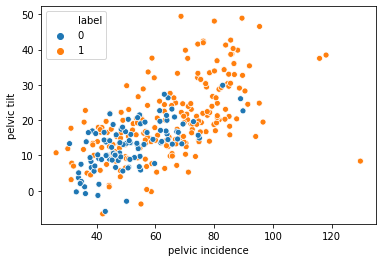

In [81]:
sns.scatterplot(x= "pelvic incidence",y = "pelvic tilt",hue='label',data =df )

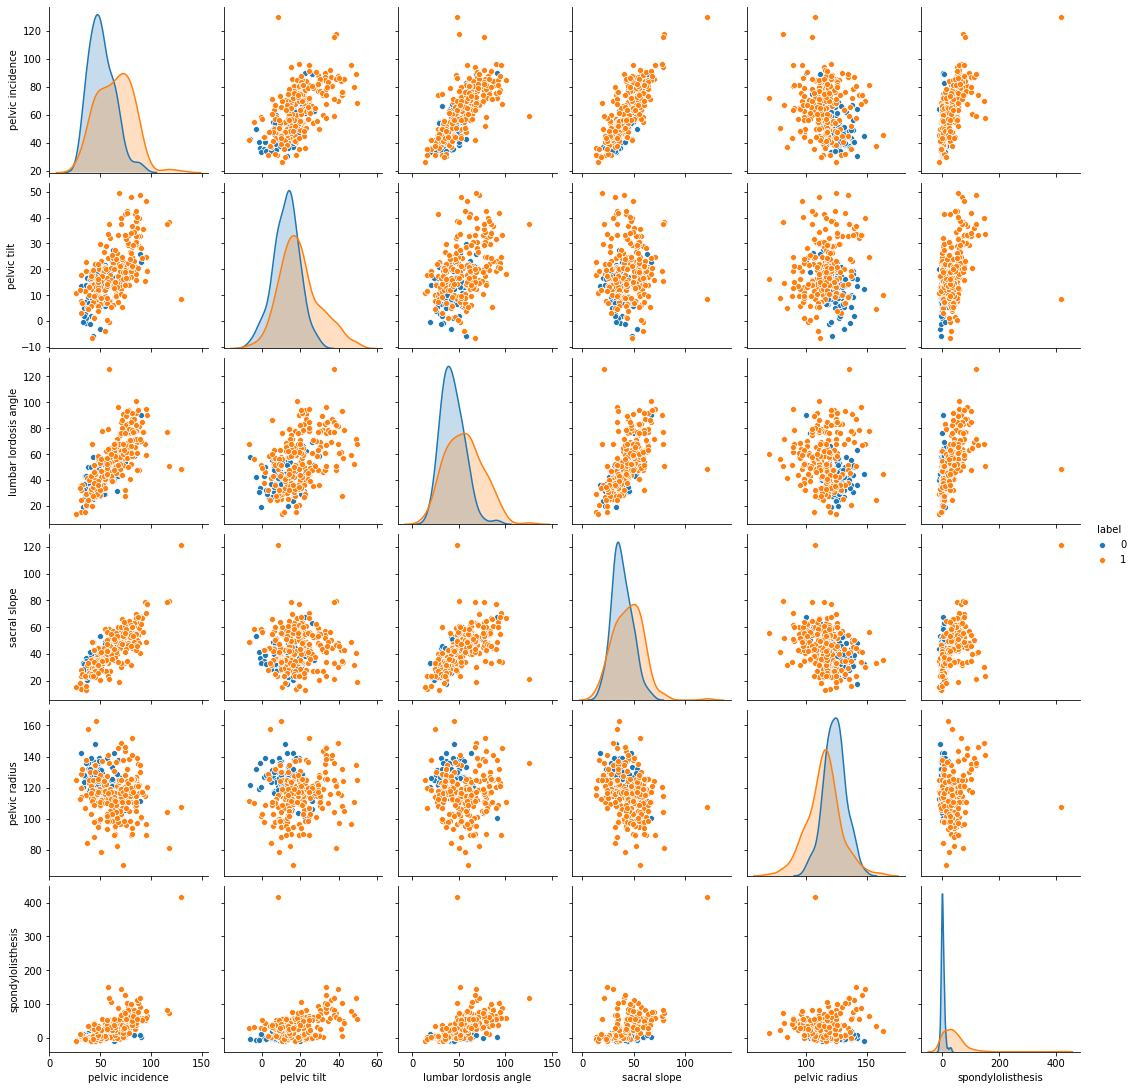

In [82]:
g = sns.pairplot(data = df,hue = 'label')

##### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

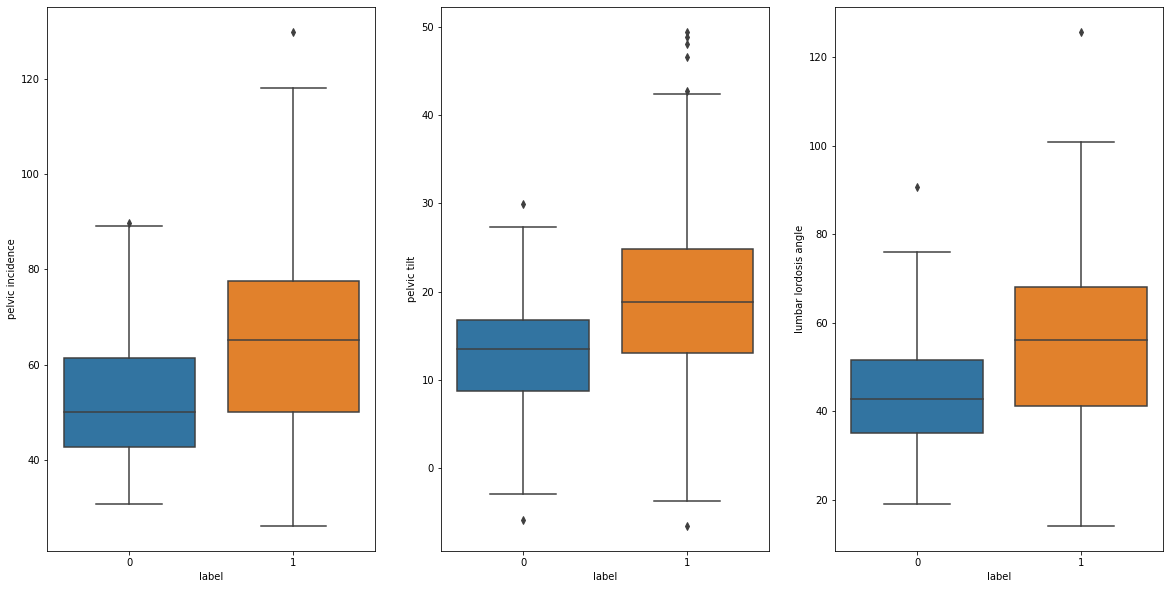

In [83]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(x = 'label',y= "pelvic incidence", data = df)
plt.subplot(1,3,2)
sns.boxplot(x ='label',y = "pelvic tilt",data = df)
plt.subplot(1,3,3)
sns.boxplot(x ='label',y = "lumbar lordosis angle",data = df)

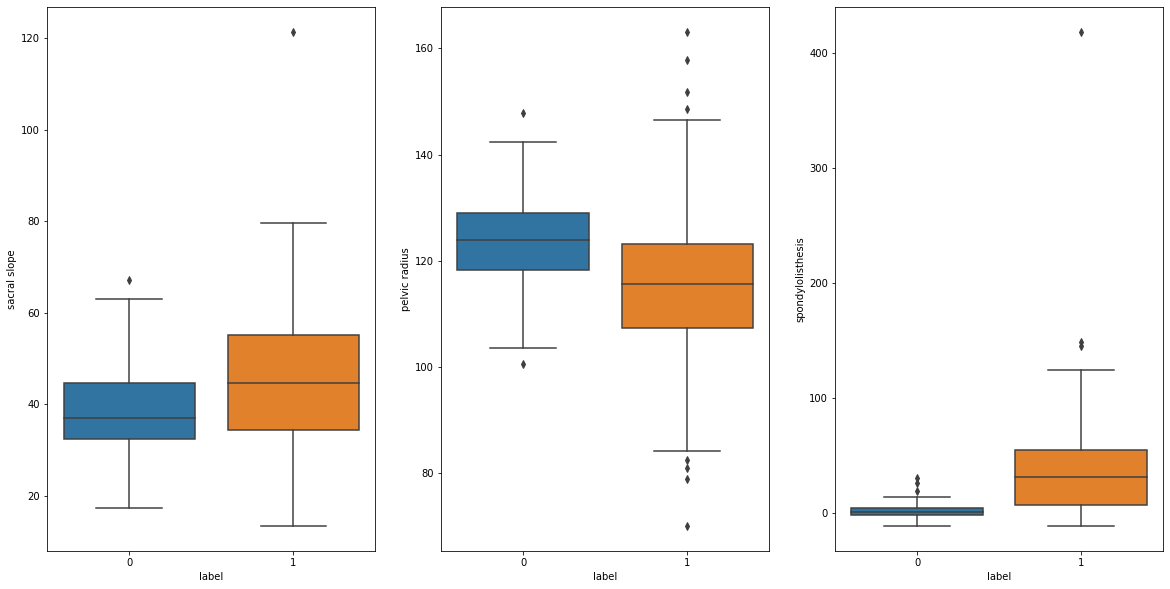

In [84]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(x = 'label',y= "sacral slope", data = df)
plt.subplot(1,3,2)
sns.boxplot(x ='label',y = "pelvic radius",data = df)
plt.subplot(1,3,3)
sns.boxplot(x ='label',y = "spondylolisthesis",data = df)

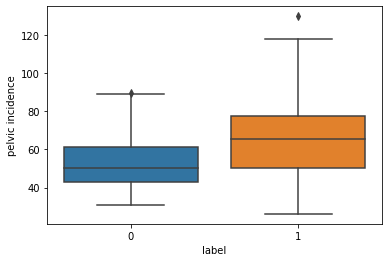

In [85]:
sns.boxplot(x = 'label',y= "pelvic incidence", data =df)

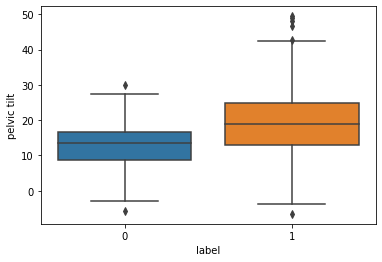

In [86]:
sns.boxplot(x ='label',y = "pelvic tilt",data = df)

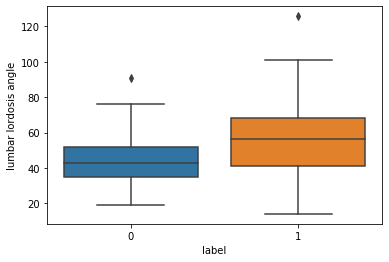

In [87]:
sns.boxplot(x ="label",y = "lumbar lordosis angle",data = df)

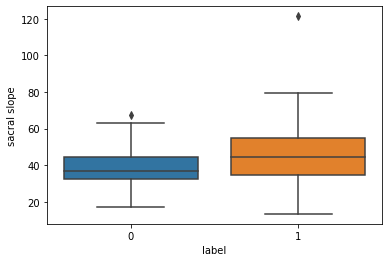

In [88]:
sns.boxplot(x = 'label',y= "sacral slope", data = df)

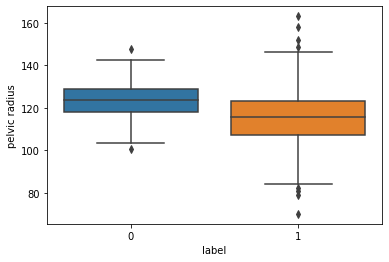

In [89]:
sns.boxplot(x ='label',y = "pelvic radius",data = df)

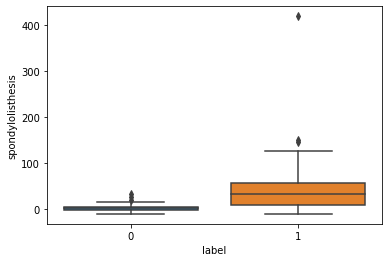

In [90]:
sns.boxplot(x ='label',y = "spondylolisthesis",data = df)

##### iii. Select the ﬁrst 70 rows of Class 0 and the ﬁrst 140 rows of Class 1 as the training set and the rest of the data as the test set. 

In [12]:
df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
df_train

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,spondylolisthesis,label
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [13]:
df_test = df[df['label']==0][70:100]
df_test = df_test.append(df[df['label']==1][140:210])
df_test

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,spondylolisthesis,label
280,50.09,13.43,34.46,36.66,119.13,3.09,0
281,64.26,14.50,43.90,49.76,115.39,5.95,0
282,53.68,13.45,41.58,40.24,113.91,2.74,0
283,49.00,13.11,51.87,35.88,126.40,0.54,0
284,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


####  (c) Classiﬁcation using KNN on Vertebral Column Data Set

##### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [14]:
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')

test_set = df_test.drop(columns = ['label'])
test_label = df_test['label']
test_label = test_label.astype('int')

In [56]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(p = 2)
neigh.fit(train_set,target)

pred1 = neigh.predict(test_set)

print("testing error:")
print(1 -neigh.score(test_set,test_label))
print("training error:")
print(1 - neigh.score(train_set,target))

testing error:
0.09999999999999998
training error:
0.14761904761904765


##### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈{208,205,...,7,4,1,} (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.1

In [57]:
from sklearn.neighbors import KNeighborsClassifier
test_err = []
train_err = []
x = range(1,209,3)

for i in x:
    k_iter = KNeighborsClassifier(p = 2,n_neighbors = i)
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    score2 = k_iter.score(train_set,target)
    test_err.append(1 - score1)
    train_err.append(1 - score2)

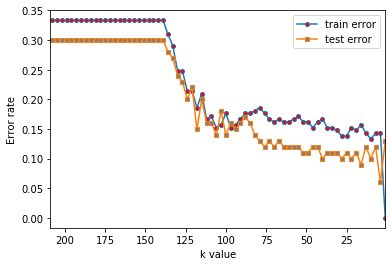

In [58]:
plt.plot(x,train_err,marker='o',markerfacecolor = 'red',markersize=4)
plt.plot(x,test_err,marker='s',markerfacecolor = 'gray',markersize=4)
plt.xlabel("k value")
plt.ylabel("Error rate")
plt.legend(["train error","test error"])
plt.xlim(209,1)
plt.show()

In [59]:
print("testing error:")
print(min(test_err))
c = np.argmin(test_err)
print("training error:")
print(min(train_err))
print("training error by k*:")
print(train_err[c])

testing error:
0.06000000000000005
training error:
0.0
training error by k*:
0.1428571428571429


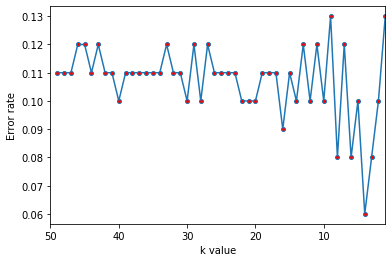

In [60]:
from sklearn.neighbors import KNeighborsClassifier
c =range(1,50)
test_err_op = []

for i in c:
    k_iter = KNeighborsClassifier(p = 2,n_neighbors = i)
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    test_err_op.append(1 - score1)

plt.plot(c,test_err_op,marker='o',markerfacecolor = 'red',markersize=4)
plt.xlabel("k value")
plt.ylabel("Error rate")
plt.xlim(50,1)
plt.show()

In [63]:
k_op = c[np.argmin(test_err_op)]
k_op

4

So the optimal k is 4

In [31]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

k_iter = KNeighborsClassifier(p = 2,n_neighbors = k_op)
k_iter.fit(train_set,target)

pred = k_iter.predict(test_set)

tn, fp, fn, tp = confusion_matrix(test_label,pred).ravel()
a = [[tp,fp],[fn,tn]]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*(precision*recall)/(precision+recall)
tnr = tn/(tn+fp)

print ('Confusion Matrix :(show like matrix)')
print('\n'.join([''.join(['{:4}'.format(item) for item in row])  for row in a]))#show like a matrix

print ('Accuracy Score :')
print (accuracy_score(test_label, pred),'\n') 
print ('Recall(True Positive Rate) : ')
print (recall,'\n')  
print("True Negative Rate:")
print(tnr,'\n')
print("Precision:")
print(precision,'\n')
print("F1 score:")
print(f1)

Confusion Matrix :(show like matrix)
  69   5
   1  25
Accuracy Score :
0.94 

Recall(True Positive Rate) : 
0.9857142857142858 

True Negative Rate:
0.8333333333333334 

Precision:
0.9324324324324325 

F1 score:
0.9583333333333333


##### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,2 which is obtained by some value of k, against the size of training set, when the size of training set is $N ∈ {10,20,30,...,210}$.3 Note: for each N, select your training set by choosing the ﬁrst $ [N/3] $ rows of Class 0 and the ﬁrst $N−[N/3]$ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from$ k = 1 $, increasing by 5. For example, if N = 200, the optimal k is selected from ${1,6,11,...,196}$. This plot is called a Learning Curve. 

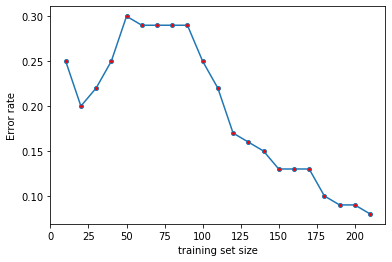

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_record = []
k1_record = []
test_err2 = []
train_err2 = []
temp = []
k = [5*i+1 for i in range(40)]
N = [10*i for i in range(1,22)]

for i in N:
    
    idx = 0
    temp = []
    temp1 = []
        
    df_train = df[df['label']==0][:np.floor(i/3).astype('int')]
    df_train = df_train.append(df[df['label']==1][:i-np.floor(i/3).astype('int')])
    train_set = df_train.drop(columns = ['label'])
    target = df_train['label']
    target = target.astype('int')
    
    j = 0
    while (k[j] < i) and (j<39):
        k_iter = KNeighborsClassifier(p = 2,n_neighbors = k[j])
        k_iter.fit(train_set,target)
        score1 = k_iter.score(test_set,test_label)
        score2 = k_iter.score(train_set,target)
        temp.append(1 - score1)
        temp1.append(1 - score2)
        j+=1
    
    idx = np.argmin(temp)
    idx1 = np.argmin(temp1)
    k_record.append(k[idx])
    k1_record.append(k[idx1])
    test_err2.append(min(temp))
    train_err2.append(min(temp1))

plt.plot(N,test_err2,marker='o',markerfacecolor = 'red',markersize=4)
plt.xlabel("training set size")
plt.ylabel("Error rate")
plt.show()

In [86]:
print("minimum test error:")
print(min(test_err2),"\n")
print("minimum train error:")
print(min(train_err2),'\n')

c = np.argmin(test_err2)
print("train error by k*:")
print(test_err2[c])

minimum test error:
0.07999999999999996 

minimum train error:
0.0 

train error by k*:
0.07999999999999996


#### Let us further explore some variants of KNN.

#### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when  {1,6,11,...,196}. 

##### i Minkowski Distance:

A. which becomes Manhattan Distance with p = 1. 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err3 = []
train_err3 = []
k = [5*i+1 for i in range(40)]

df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')
    
for i in k:
    k_iter = KNeighborsClassifier(p = 1,n_neighbors = i,metric='minkowski')
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    score2 = k_iter.score(train_set,target)
    
    test_err3.append(1 - score1) 
    train_err3.append(1-score2)

idx = np.argmin(test_err3)
k [idx]

6

In [16]:
print("minimum test error:")
print(min(test_err3),"\n")
print("minimum train error:")
print(min(train_err3),'\n')
print("train error by k*:")
print(train_err3[idx],'\n')
err_man = min(test_err3)

minimum test error:
0.10999999999999999 

minimum train error:
0.0 

train error by k*:
0.13809523809523805 



B. with $ $ log10(p) $ ∈ ${0.1,0.2,0.3,...,1} $ $. In this case, use the $ k ^*$ you found for the Manhattan distance in 1(d)iA. What is the best $ log10(p) $

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err4 = []
train_err4 = []
k_op = 6
p = [10**(0.1*i) for i in range(1,11)]

df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')
    
for i in p:
    k_iter = KNeighborsClassifier(p = i,n_neighbors = k_op)
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    score2 = k_iter.score(train_set,target)
    test_err4.append(1 - score1)   
    train_err4.append(1-score2)
idx = np.argmin(test_err4)
print(0.1*(1+idx))

0.6000000000000001


The best  $ log10(p) $ is 0.6

In [18]:
print("minimum test error:")
print(min(test_err4),"\n")
print("minimum train error:")
print(min(train_err4),'\n')
print("train error by k*:")
print(train_err4[idx],'\n')
err_log = min(test_err4)

minimum test error:
0.06000000000000005 

minimum train error:
0.1333333333333333 

train error by k*:
0.1523809523809524 



C. which becomes Chebyshev Distance with $ p→∞ $ 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err5 = []
train_err5 = []
k = [5*i+1 for i in range(40)]

df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')

for i in k:
    k_iter = KNeighborsClassifier(n_neighbors = i,metric = 'chebyshev' )
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    score2 = k_iter.score(train_set,target)
    test_err5.append(1 - score1)   
    train_err5.append(1 - score2)
idx = np.argmin(test_err5)
k [idx]

16

In [20]:
print("minimum test error:")
print(min(test_err5),"\n")
print("minimum train error:")
print(min(train_err5),'\n')
print("minimum train error by k*:")
print(train_err5[idx],'\n')
err_che = min(test_err5)

minimum test error:
0.07999999999999996 

minimum train error:
0.0 

minimum train error by k*:
0.14761904761904765 



##### ii. Mahalanobis Distance.

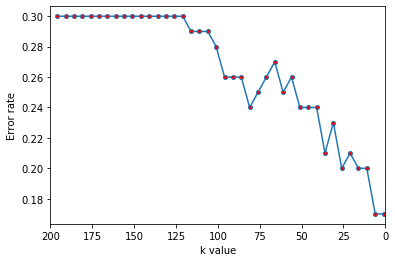

0.17000000000000004


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err5 = []
train_err5 = []
k = [5*i+1 for i in range(40)]

df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')

for i in k:
    k_iter = KNeighborsClassifier(n_neighbors = i,metric = 'mahalanobis',metric_params={'V':train_set.cov()} )
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    score2 = k_iter.score(train_set,target)
    test_err5.append(1 - score1)
    train_err5.append(1 - score2)

idx = np.argmin(test_err5)
min1 = min(train_err5)
plt.plot(k,test_err5,marker='o',markerfacecolor = 'red',markersize=4)
plt.xlim(200,0)
plt.xlabel("k value")
plt.ylabel("Error rate")
plt.show()
print(min(test_err5))

In [44]:
test_err5[-1] ==test_err5[-2]

True

From the figure, we know that the error rate of 1 and 6 are the same. Calculate the error rate between 1 and 6 and choose the proper one

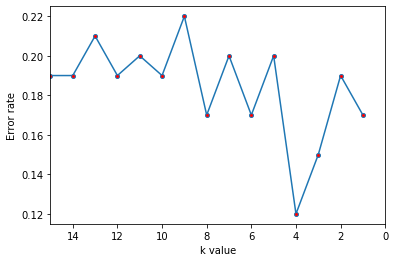

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err6 = []
train_err6 = []
k = [1*i+1 for i in range(15)]

df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')

for i in k:
    k_iter = KNeighborsClassifier(n_neighbors = i,metric = 'mahalanobis',metric_params={'V':train_set.cov()} )
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    score2 = k_iter.score(train_set,target)
    test_err6.append(1 - score1) 
    train_err6.append(1 -score2)
    
plt.plot(k,test_err6,marker='o',markerfacecolor = 'red',markersize=4)
plt.xlim(15,0)
plt.xlabel("k value")
plt.ylabel("Error rate")
plt.show()

From the figure above, we know that the best k is 4. Owing that we can only choose the k value from $ ${$1,6,11,...,196 $ } $ $, so I think **6** is more reasonable

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err6 = []
train_err6 = []

df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')

k_iter = KNeighborsClassifier(n_neighbors = 6,metric = 'mahalanobis',metric_params={'V':train_set.cov()} )
k_iter.fit(train_set,target)
score1 = k_iter.score(test_set,test_label)
score2 = k_iter.score(train_set,target)
test_err6.append(1 - score1) 
train_err6.append(1 -score2)

print("minimum test error:")
print(test_err6[0],"\n")
print("minimum train error:")
print(min1,'\n')
print('train error by k*:')
print(train_err6[0])
err_mah = min(test_err6)

minimum test error:
0.17000000000000004 

minimum train error:
0.0 

train error by k*:
0.11904761904761907


In [41]:
from astropy.table import Table
t = Table()
data=[{'Manhattan distance':err_man,'Minkowski p =log10':err_log,'Chebyshev':err_che,'Mahalanobis':err_mah}]
t= Table(rows=data)
print(t)

     Chebyshev          Mahalanobis      Manhattan distance  Minkowski p =log10
------------------- ------------------- ------------------- -------------------
0.07999999999999996 0.17000000000000004 0.10999999999999999 0.06000000000000005


#### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈{1,6,11,16,...,196}. 

In [28]:
df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')

i) for Euclidean Distance:

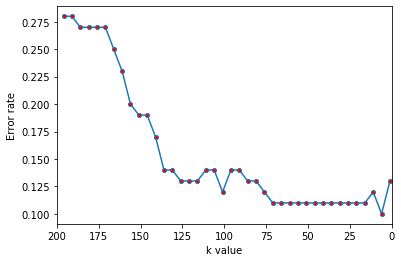

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err7 = []
train_err7 = []
k = [5*i+1 for i in range(40)]

for i in k:
    k_iter = KNeighborsClassifier(n_neighbors = i,weights = 'distance' )
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    score2 = k_iter.score(train_set,target)
    test_err7.append(1 - score1)  
    train_err7.append(1 - score2)

idx = np.argmin(test_err7)

plt.plot(k,test_err7,marker='o',markerfacecolor = 'red',markersize=4)
plt.xlim(200,0)
plt.xlabel("k value")
plt.ylabel("Error rate")
plt.show()

In [99]:
k[idx]

6

In [33]:
print("minimum test error:")
print(min(test_err7),"\n")
print("minimum train error:")
print(min(train_err7),'\n')
print('train error:')
print(train_err7)
err_euc1 = min(test_err7)

minimum test error:
0.09999999999999998 

minimum train error:
0.0 

train error:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


ii) for Manhattan Distance:

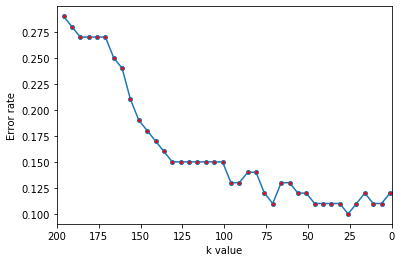

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err8 = []
train_err8 = []
k = [5*i+1 for i in range(40)]

for i in k:
    k_iter = KNeighborsClassifier(n_neighbors = i,weights = 'distance',p=1 )
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    test_err8.append(1 - score1)   
    score2 = k_iter.score(train_set,target)
    train_err8.append(1-score2)

idx = np.argmin(test_err8)

plt.plot(k,test_err8,marker='o',markerfacecolor = 'red',markersize=4)
plt.xlim(200,0)
plt.xlabel("k value")
plt.ylabel("Error rate")
plt.show()

In [35]:
k[idx]

26

In [36]:
print("minimum test error:")
print(min(test_err8),"\n")
print("minimum train error:")
print(min(train_err8),'\n')
print('train error:')
print(train_err8)
err_man1 = min(test_err8)

minimum test error:
0.09999999999999998 

minimum train error:
0.0 

train error:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


iii) for Chebyshev distances:

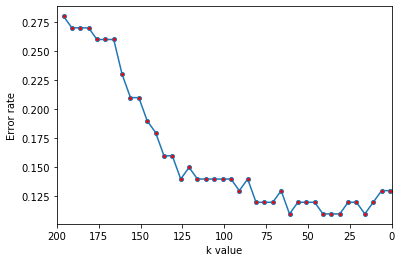

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_err9 = []
train_err9 = []
k = [5*i+1 for i in range(40)]

df_train = df[df['label']==0][:70]
df_train = df_train.append(df[df['label']==1][:140])
train_set = df_train.drop(columns = ['label'])
target = df_train['label']
target = target.astype('int')

for i in k:
    k_iter = KNeighborsClassifier(n_neighbors = i,metric = 'chebyshev',weights = 'distance' )
    k_iter.fit(train_set,target)
    score1 = k_iter.score(test_set,test_label)
    score2 = k_iter.score(train_set,target)
    test_err9.append(1 - score1)
    train_err9.append(1 - score2)

idx = np.argmin(test_err9)

plt.plot(k,test_err9,marker='o',markerfacecolor = 'red',markersize=4)
plt.xlim(200,0)
plt.xlabel("k value")
plt.ylabel("Error rate")
plt.show()

In [38]:
k[idx]

16

In [39]:
print("minimum test error:")
print(min(test_err9),"\n")
print("minimum train error:")
print(min(train_err9),'\n')
print('train error:')
print(train_err9)
err_che1 = min(test_err9)

minimum test error:
0.10999999999999999 

minimum train error:
0.0 

train error:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [40]:
from astropy.table import Table
t = Table()
data=[{'Euclidean distance':err_euc1,'Manhattan distance':err_man1,'Chebyshev':err_che1}]
t= Table(rows=data)
print(t)

     Chebyshev       Euclidean distance  Manhattan distance
------------------- ------------------- -------------------
0.10999999999999999 0.09999999999999998 0.09999999999999998


#### (f) What is the lowest training error rate you achieved in this homework?

the lowest training error rate I achieved **0**.\
First, when k is 1 ,all train error will be 0, because we use the point itselt for prediction.


when using the "distance" method, when the trainset point's weight will be 1 when  evaluate the point itself, so every training error by this method will be **0**

when focusing on the optimal k on the uniform weights, the lowest training error is **0.07999999999999996**